In [145]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting


In [146]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [147]:
## 读取数据
path = 'D:/tx/regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head() # 返回data中的前几行数据，默认是前5行。

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [148]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:]#X是所有行，最后一列

In [149]:
X_data_normalized = (X_data - X_data.min()) / (X_data.max()-X_data.min())


In [150]:
X_data_normalized.insert(0, 'Ones', 1)

In [151]:
X_data_normalized.head()#head()是观察前5行

,Ones,人口
0,1,0.063064
1,1,0.029157
2,1,0.203288
3,1,0.115061
4,1,0.048492


In [152]:
y_data.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [153]:
X=X_data_normalized.values
Y=y_data.values
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

In [154]:
(X.shape,Y.shape, W.shape)#维度

((97, 2), (97, 1), (2, 1))

In [155]:
def computeCost(X, Y, W):
    Y_hat = np.dot(X,W)
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])# (m,n) @ (n, 1) -> (n, 1)
    return loss

In [156]:
def gradientDescent(X, Y, W, alpha):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]
#     dW = X.T@(Y_hat-Y)
    W += -alpha * dW
    return W

In [157]:
def linearRegression(X,Y, alpha, iters):
    loss_his = []
    # step1: initialize the model parameters
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2 : using the initilized parameters to predict the output and calculate the loss   
        loss = computeCost(X,Y,W)
        loss_his.append(loss)
        # step3: using the gradient decent method to update the parameters 
        W=gradientDescent(X, Y, W, alpha)
    return loss_his, W ## 返回损失和模型参数。

In [158]:
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X,W)
    return y_pre

In [159]:
alpha =0.01
iters = 10000
loss_his, W = linearRegression(X,Y, alpha, iters)

In [160]:
W

array([[ 2.13040257],
       [20.34079435]])

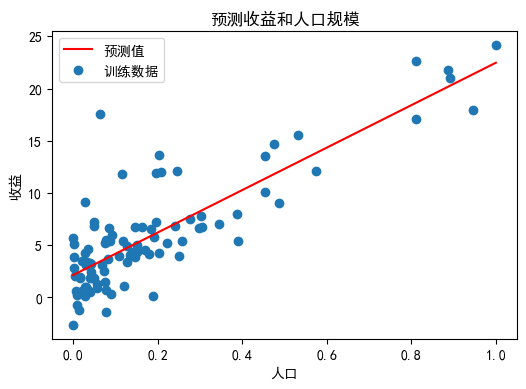

In [161]:
x = np.linspace(X_data_normalized['人口'].min(), X_data_normalized['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data_normalized['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('预测收益和人口规模')
plt.show()

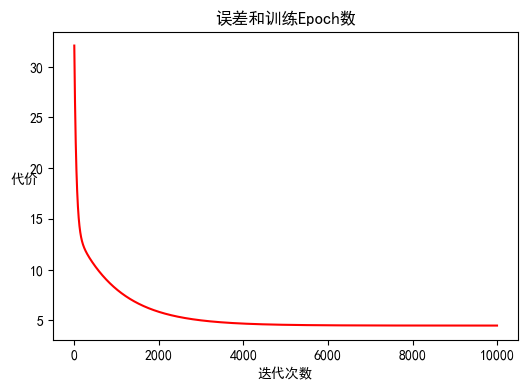

In [162]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his, 'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()